In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
city = pd.read_csv('//content//dim_cities.csv')
rep = pd.read_csv('//content//dim_repondents.csv')
survey = pd.read_csv('//content//fact_survey_responses.csv')

In [ ]:
city.head()

In [ ]:
rep.head()

In [ ]:
survey.head()

In [ ]:
City_rep= pd.merge(city, rep, on='City_ID', how='outer')

In [ ]:
Full = pd.merge(City_rep, survey, on='Respondent_ID', how='outer')

In [ ]:
Full

In [ ]:
Full.isnull().sum()
dfresult = Full.dropna(axis=1)
print(dfresult)

# Save the merged DataFrame to a new CSV file
Full.to_csv('Final.csv', index=False)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
path = '/content/drive/My Drive/final.csv'
with open(path, 'w', encoding = 'utf-8-sig') as f:
  Full.to_csv(f)

Mounted at /content/drive


In [ ]:
Full.dtypes

In [ ]:
Full.Price_range.values

array(['50-99', '50-99', '100-150', ..., nan, nan, nan], dtype=object)

In [ ]:
# Label Encoding
def print_unique_col(df):
  for column in df:
    if df[column].dtype == 'object':
      print(f'{column} : {df[column].unique()}')
print_unique_col(Full)

City_ID : ['CT111' 'CT112' 'CT113' 'CT114' 'CT115' 'CT116' 'CT117' 'CT118' 'CT119'
 'CT120']
City : ['Delhi' 'Mumbai' 'Bangalore' 'Chennai' 'Kolkata' 'Hyderabad' 'Ahmedabad'
 'Pune' 'Jaipur' 'Lucknow']
Tier : ['Tier 1' 'Tier 2']
Name : ['Armaan Bassi' 'Kiaan Uppal' 'Hazel Chanda' ... 'Sara Kothari'
 'Shamik Deep' 'Ahana  Arya']
Age : ['31-45' '19-30' '65+' '46-65' '15-18']
Gender : ['Non-binary' 'Female' 'Male']
Consume_frequency : ['2-3 times a month' '2-3 times a week' 'Rarely' 'Daily' 'Once a week']
Consume_time : ['To stay awake during work/study' 'Before exercise'
 'For mental alertness' 'Throughout the day']
Consume_reason : ['Increased energy and focus' 'To combat fatigue'
 'To enhance sports performance' 'To boost performance' 'Other']
Heard_before : ['Yes' 'No']
Brand_perception : ['Neutral' 'Positive' 'Negative']
General_perception : ['Dangerous' 'Not sure' 'Healthy' 'Effective']
Tried_before : ['No' 'Yes']
Reasons_preventing_trying : ['Other' 'Health concerns' 'Not intereste

# 1. Demographic Insights (examples)
# a. Who prefers energy drink more? (male/female/non-binary?)
# b. Which age group prefers energy drinks more?
# c. Which type of marketing reaches the most Youth (15-30)?

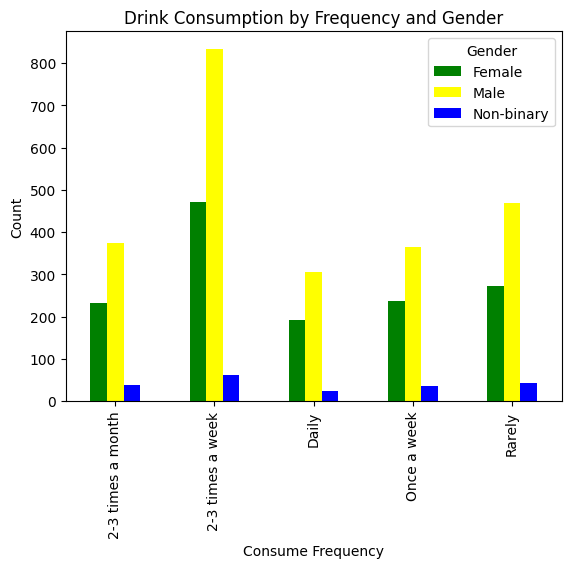

In [ ]:
# a. Who prefers energy drink more? (male/female/non-binary?)
drink_pref = Full.groupby(['Consume_frequency', 'Gender']).size().unstack()
drink_pref.plot(kind='bar', color=['green', 'yellow','blue'])

plt.title('Drink Consumption by Frequency and Gender')
plt.xlabel('Consume Frequency')
plt.ylabel('Count ')
plt.legend(title='Gender')
plt.show()

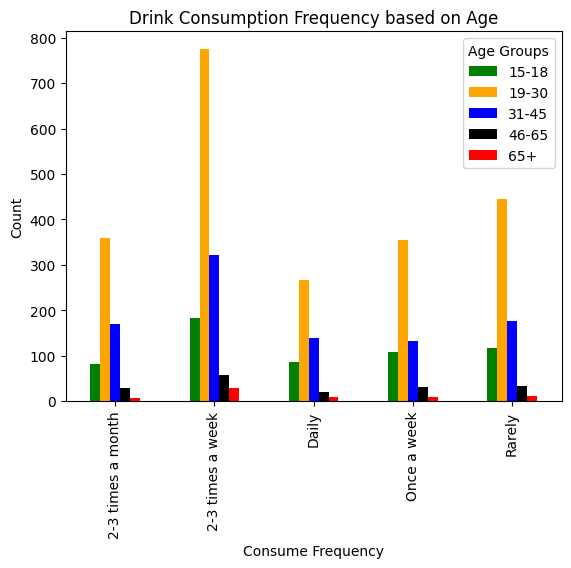

In [ ]:

# b. Which age group prefers energy drinks more?
drink_pref = Full.groupby(['Consume_frequency','Age']).size().unstack()
drink_pref.plot(kind='bar', color=['green', 'orange','blue','black','red'])

plt.title('Drink Consumption Frequency based on Age')
plt.xlabel('Consume Frequency')
plt.ylabel('Count')
plt.legend(title='Age Groups')
plt.show()

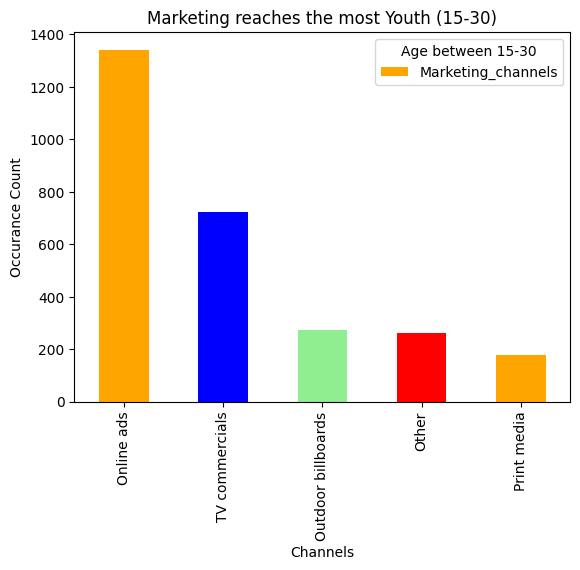

In [ ]:
# c. Which type of marketing reaches the most Youth (15-30)?
marketing_reach = Full.loc[(Full["Age"]== "15-18") | (Full['Age']=='19-30'),"Marketing_channels"].value_counts()
marketing_reach.plot(kind='bar', color=['orange','blue','lightgreen','red'])

plt.title('Marketing reaches the most Youth (15-30)')
plt.xlabel('Channels')
plt.ylabel('Occurance Count')
plt.legend(title='Age between 15-30')
plt.show()

# 2. Consumer Preferences:
# a. What are the preferred ingredients of energy drinks among respondents?
# b. What packaging preferences do respondents have for energy drinks?

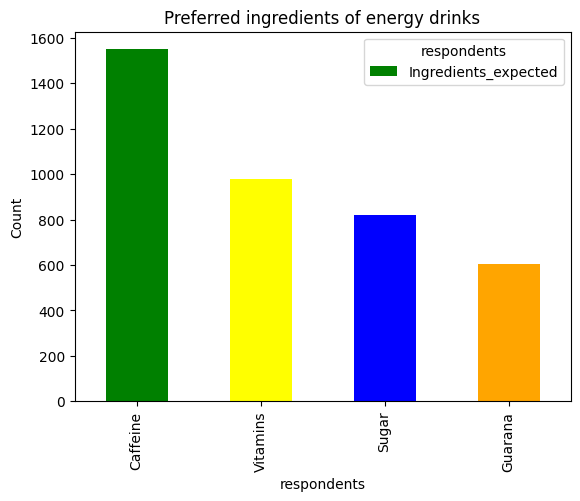

In [ ]:
# a. What are the preferred ingredients of energy drinks among respondents?

Full['Ingredients_expected'].value_counts()[:].plot(kind='bar', color=['green', 'yellow','blue', 'orange'])

plt.title('Preferred ingredients of energy drinks')
plt.xlabel('respondents')
plt.ylabel('Count')
plt.legend(title='respondents')
plt.show()

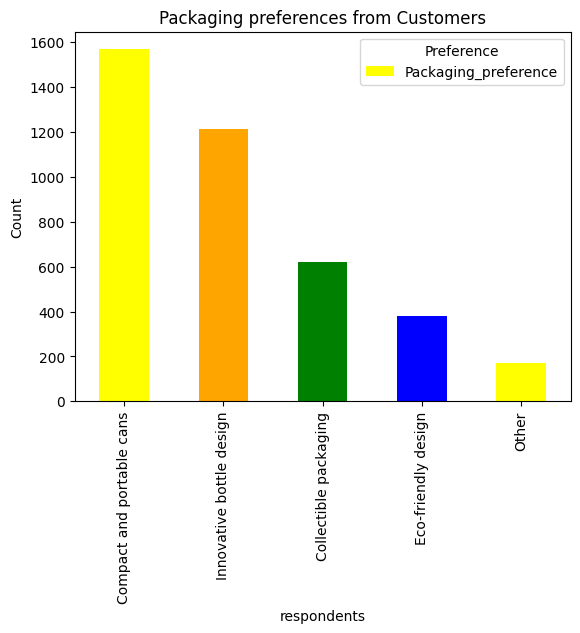

In [ ]:
# b. What packaging preferences do respondents have for energy drinks?

Full['Packaging_preference'].value_counts()[:].plot(kind='bar', color=[ 'yellow', 'orange', 'green','blue'])

plt.title('Packaging preferences from Customers')
plt.xlabel('respondents')
plt.ylabel('Count')
plt.legend(title='Preference')
plt.show()

# 3. Competition Analysis:
# a. Who are the current market leaders?
# b. What are the primary reasons consumers

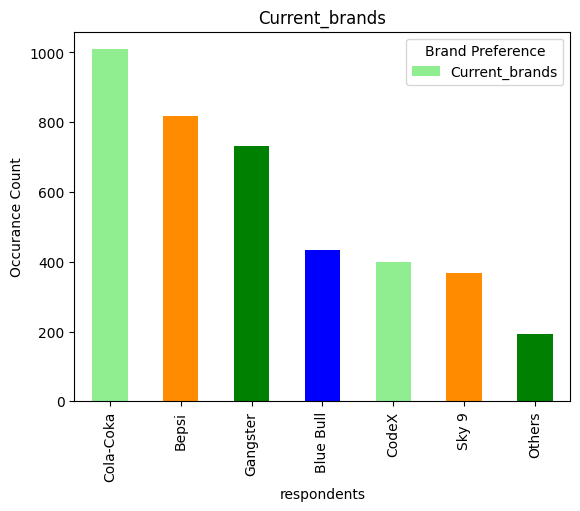

In [ ]:
# a. Who are the current market leaders?

Full['Current_brands'].value_counts()[:].plot(kind='bar', color=[ 'lightgreen', 'darkorange', 'green','blue'])

plt.title('Current_brands')
plt.xlabel('respondents')
plt.ylabel('Occurance Count')
plt.legend(title='Brand Preference')
plt.show()

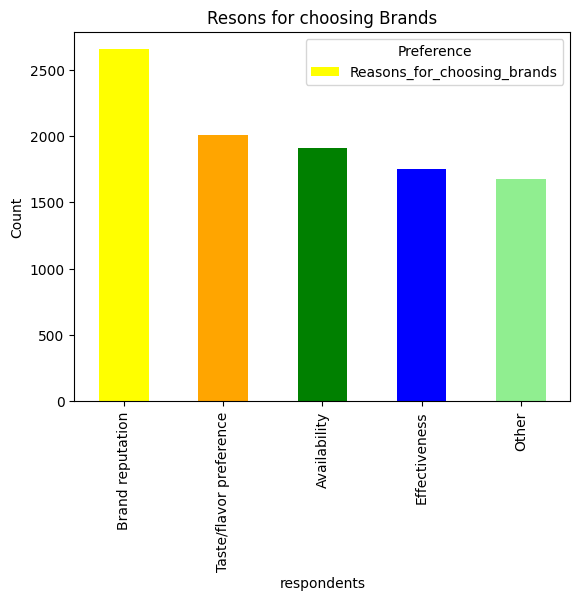

In [ ]:
# b. What are the primary reasons consumers
Full['Reasons_for_choosing_brands'].value_counts()[:].plot(kind='bar', color=[ 'yellow', 'orange', 'green','blue', 'lightgreen'])

plt.title('Resons for choosing Brands')
plt.xlabel('respondents')
plt.ylabel('Count')
plt.legend(title='Preference')
plt.show()

# 4. Marketing Channels and Brand Awareness:
# a. Which marketing channel can be used to reach more customers?
# b. How effective are different marketing strategies and channels in reaching our customers?

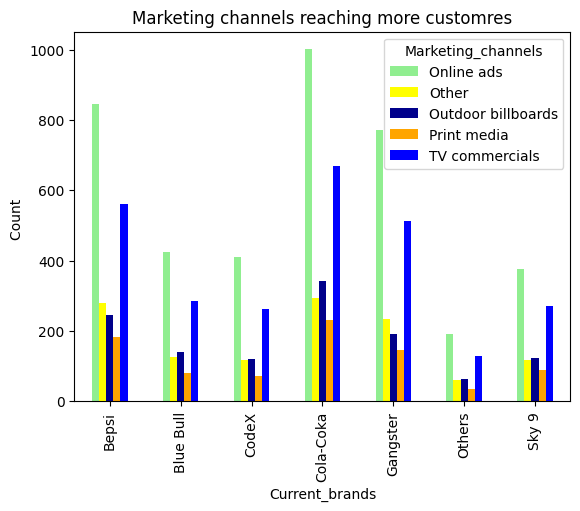

In [ ]:
# a. Which marketing channel can be used to reach more customers?
drink_pref = Full.groupby(['Current_brands', 'Marketing_channels']).size().unstack()
drink_pref.plot(kind='bar', color=['lightgreen', 'yellow','darkblue', 'orange','blue'])

plt.title('Marketing channels reaching more customres')
plt.xlabel('Current_brands')
plt.ylabel('Count ')
plt.legend(title='Marketing_channels')
plt.show()

In [ ]:
# b. How effective are different marketing strategies and channels in reaching our customers?


# 5. Brand Penetration:
## a. What do people think about our brand? (overall rating)
## b. Which cities do we need to focus more on?


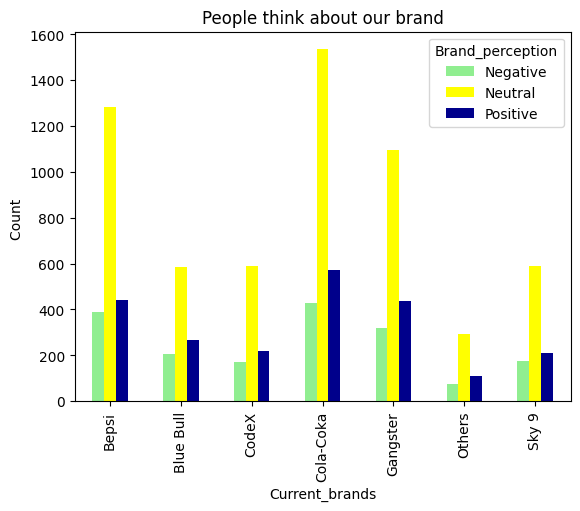

In [ ]:
# a. What do people think about our brand? (overall rating)
People_think = Full.groupby(['Current_brands', 'Brand_perception']).size().unstack()
People_think.plot(kind='bar', color=['lightgreen', 'yellow','darkblue', 'orange','blue'])

plt.title('People think about our brand')
plt.xlabel('Current_brands')
plt.ylabel('Count ')
plt.legend(title='Brand_perception')
plt.show()

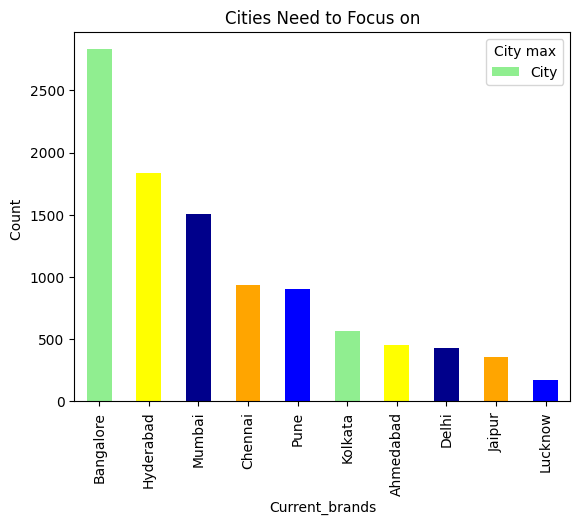

In [29]:
# b. Which cities do we need to focus more on?
People_think = Full['City'].value_counts()
People_think.plot(kind='bar', color=['lightgreen', 'yellow','darkblue', 'orange','blue'])

plt.title('Cities Need to Focus on')
plt.xlabel('Current_brands')
plt.ylabel('Count ')
plt.legend(title='City max')
plt.show()

#6. Purchase Behavior:
##a. Where do respondents prefer to purchase energy drinks?
##b. What are the typical consumption situations for energy drinks among respondents?
##c. What factors influence respondents' purchase decisions, such as price range and limited edition packaging?


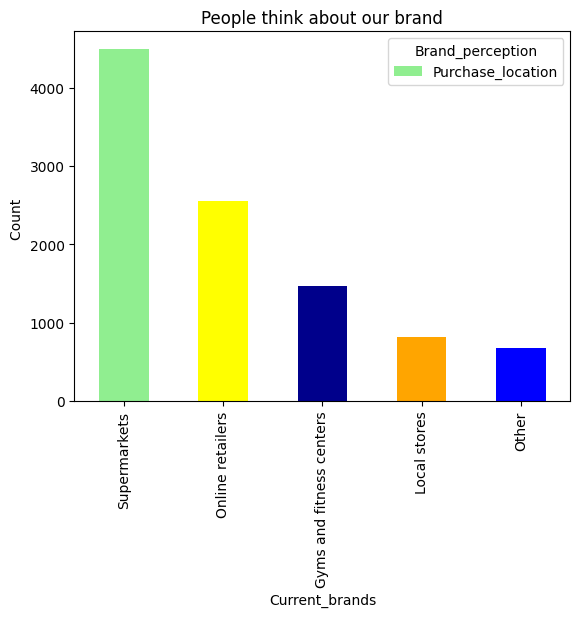

In [ ]:
#a. Where do respondents prefer to purchase energy drinks?
People_think = Full['Purchase_location'].value_counts()
People_think.plot(kind='bar', color=['lightgreen', 'yellow','darkblue', 'orange','blue'])

plt.title('People think about our brand')
plt.xlabel('Current_brands')
plt.ylabel('Count ')
plt.legend(title='Brand_perception')
plt.show()

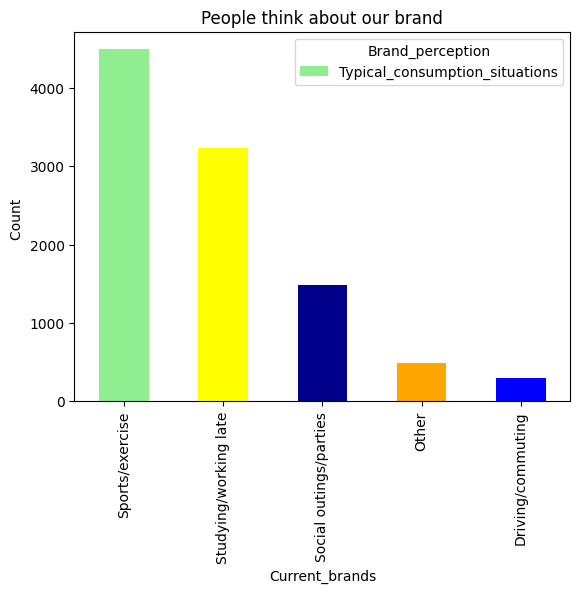

In [ ]:
#b. What are the typical consumption situations for energy drinks among respondents?
People_think = Full['Typical_consumption_situations'].value_counts()
People_think.plot(kind='bar', color=['lightgreen', 'yellow','darkblue', 'orange','blue'])

plt.title('People think about our brand')
plt.xlabel('Current_brands')
plt.ylabel('Count ')
plt.legend(title='Brand_perception')
plt.show()

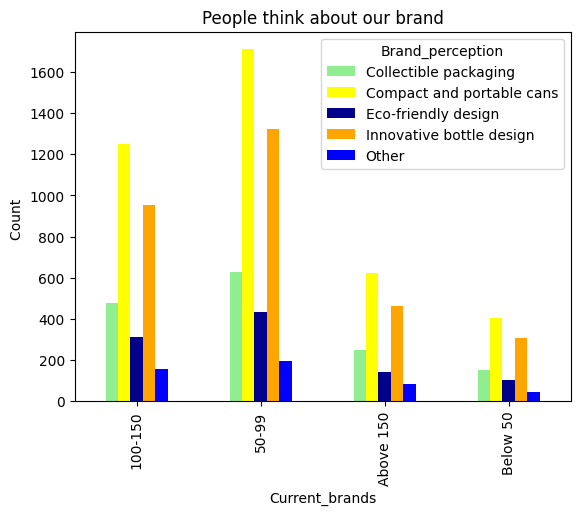

In [ ]:
#c. What factors influence respondents' purchase decisions, such as price range and limited edition packaging?
People_think = Full.groupby(['Price_range', 'Packaging_preference']).size().unstack()
People_think.plot(kind='bar', color=['lightgreen', 'yellow','darkblue', 'orange','blue'])

plt.title('People think about our brand')
plt.xlabel('Current_brands')
plt.ylabel('Count ')
plt.legend(title='Brand_perception')
plt.show()

# 7. Product Development
## a. Which area of business should we focus more on our product development? (Branding/taste/availability)

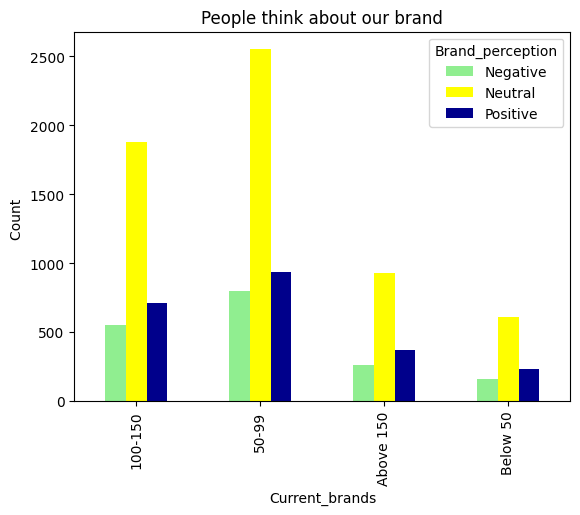

In [ ]:
# a. Which area of business should we focus more on our product development? (Branding/taste/availability)
People_think = Full.groupby(['Current_brands', 'Brand_perception']).size().unstack()
People_think.plot(kind='bar', color=['lightgreen', 'yellow','darkblue', 'orange','blue'])

plt.title('People think about our brand')
plt.xlabel('Current_brands')
plt.ylabel('Count ')
plt.legend(title='Brand_perception')
plt.show()

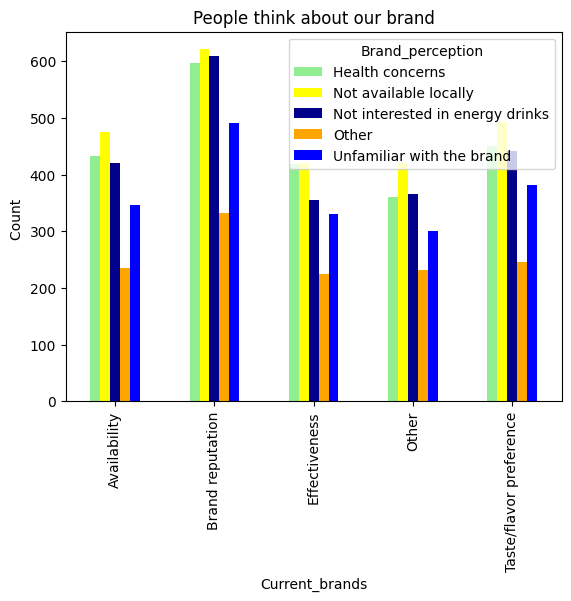

In [31]:
People_think = Full.groupby(['Reasons_for_choosing_brands','Reasons_preventing_trying']).size().unstack()
People_think.plot(kind='bar', color=['lightgreen', 'yellow','darkblue', 'orange','blue'])

plt.title('People think about our brand')
plt.xlabel('Current_brands')
plt.ylabel('Count ')
plt.legend(title='Brand_perception')
plt.show()

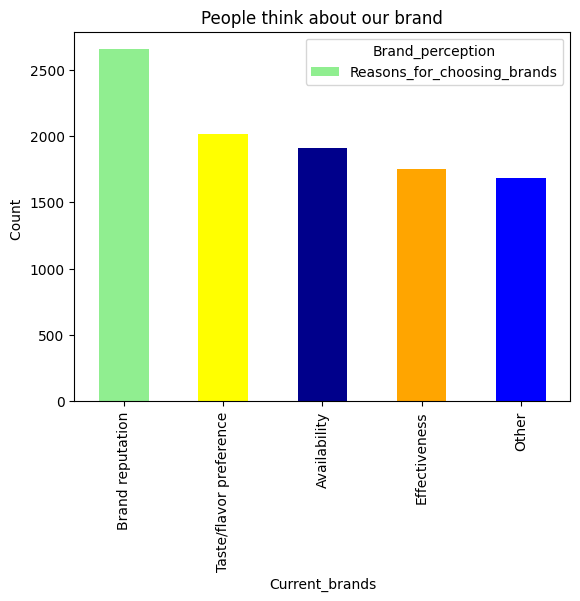

In [32]:
People_think = Full['Reasons_for_choosing_brands'].value_counts()
People_think.plot(kind='bar', color=['lightgreen', 'yellow','darkblue', 'orange','blue'])

plt.title('People think about our brand')
plt.xlabel('Current_brands')
plt.ylabel('Count ')
plt.legend(title='Brand_perception')
plt.show()